<a href="https://colab.research.google.com/github/RR-Priyadharshini/Infosys_Study-Track-AI-based-Student-Study-Habit-Recommender/blob/main/recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

# Load the clustered dataset
file_path = "students_clustered.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nPreview:")
display(df.head())

Dataset loaded successfully!
Shape: (10, 3)

Preview:


,PCA1,PCA2,ClusterID
0,0.091308,0.310889,0
1,-0.345657,-0.339473,0
2,2.431822,0.329970,1
3,-2.096895,-0.065156,2
4,1.699275,-0.754967,1


In [23]:
# Step 2: Create recommendations for each cluster

# Define recommendations for each cluster
recommendations = {
    0: "Students in Cluster 0 may need better study discipline. Suggest increasing study hours and minimizing distractions.",
    1: "Students in Cluster 1 are balanced. Encourage maintaining consistent study habits and improving time management.",
    2: "Students in Cluster 2 are high-performing. Suggest exploring advanced topics and helping peers."
}

# Ensure ClusterID column exists
if 'ClusterID' not in df.columns:
    raise KeyError("ClusterID column not found in dataframe. Make sure your CSV from Milestone 2 includes 'ClusterID'.")

# Convert ClusterID to integer if possible
try:
    df['ClusterID'] = df['ClusterID'].astype(int)
except Exception:
    pass

# Map recommendations to each student based on ClusterID
df['Recommendation'] = df['ClusterID'].map(recommendations)

# Fill any missing recommendations with a default message
df['Recommendation'] = df['Recommendation'].fillna(
    "No predefined recommendation for this cluster. Please analyze cluster characteristics."
)

# Display a sample (use student_id if present)
if 'student_id' in df.columns:
    display(df[['student_id', 'ClusterID', 'Recommendation']].head())
else:
    display(df[['ClusterID', 'Recommendation']].head())

,ClusterID,Recommendation
0,0,Students in Cluster 0 may need better study di...
1,0,Students in Cluster 0 may need better study di...
2,1,Students in Cluster 1 are balanced. Encourage ...
3,2,Students in Cluster 2 are high-performing. Sug...
4,1,Students in Cluster 1 are balanced. Encourage ...


In [24]:
# Step 3: Save the final dataset with recommendations
df.to_csv("students_with_recommendations.csv", index=False)
print("✅ File saved successfully as 'students_with_recommendations.csv'")

✅ File saved successfully as 'students_with_recommendations.csv'


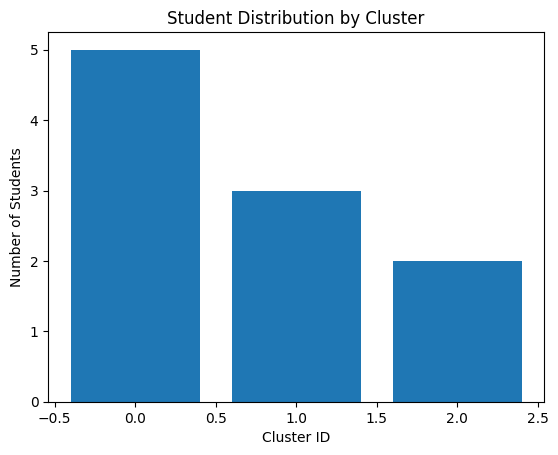

In [25]:
import matplotlib.pyplot as plt

cluster_counts = df['ClusterID'].value_counts().sort_index()

plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Students")
plt.title("Student Distribution by Cluster")
plt.show()